In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.linalg

import sys
# sys.path.append('./Processus-Wishart-513/')

import sampling
import cir
from wishart import wishart

## CIR Process

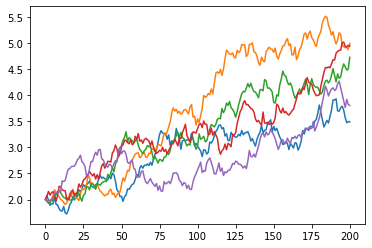

In [3]:
k = 0
a = 1.2
sigma = 0.5
n = 200
T = 2.0

cir_gen = cir.CIR(k, a, sigma, x0=2)
V = cir_gen(T=T, n=n, num=5)
plt.plot(V.T)
plt.show()

## Wishart


Here we demo the simulation of $X_T$, with $a=[[2, -1], [2, 1]]$, and $b = e_2^1$.

In [48]:
x = np.array([[1,0],[0,2]])
b = np.array([[1,1],[1,1]])
a = np.array([[2,-1],[2,1]])
w = wishart.Wishart(x, 3, a, b)
t = 1

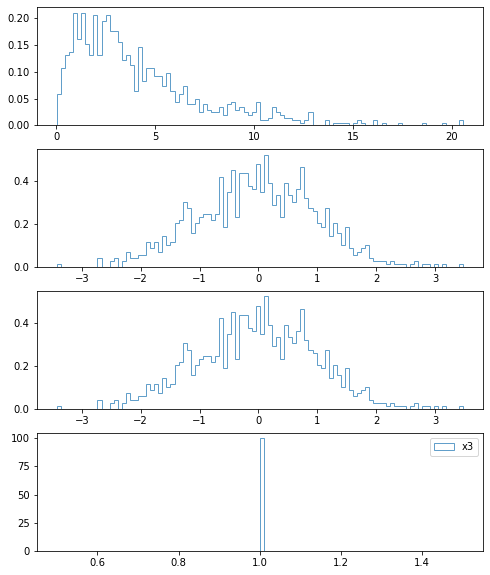

In [52]:
Xt = w.wishart_e(T=t, N=1000, num=1000)
Yt = Xt[:, -1].reshape(-1, 4)

fig, axs = plt.subplots(4, figsize=(8, 10))
for i in range(4):
    axs[i].hist(Yt[:, i], density=True, bins=100, alpha=.7, histtype='step', label=f'x{i}')

plt.legend()
plt.show()

Here we demo the simulation of $X_T$, with $a=[[2, -1], [2, 1]]$, and $b = [[1, 1], [1, 1]]$, with different iteration time $N$.

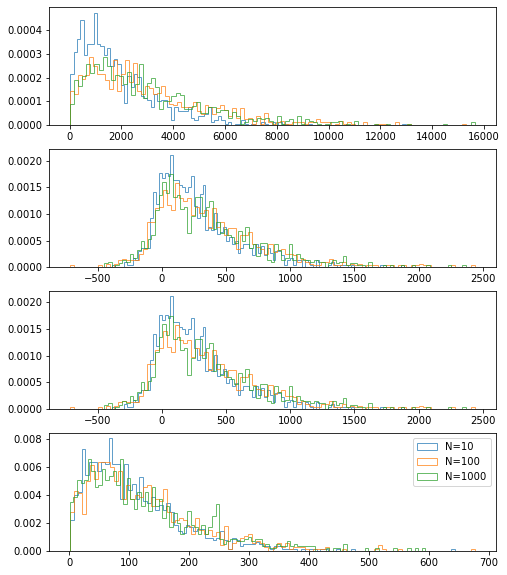

In [54]:
lst_N = [10, 100, 1000]
lst_N_Xt_3 = [w.wishart(T=t, N=N, num=1000, b=b, a=a) for N in lst_N]
lst_N_Yt = [Xt.reshape(-1, 4) for Xt in lst_N_Xt_3]

fig, axs = plt.subplots(4, figsize=(8, 10))
for i in range(4):
    for j in range(len(lst_N)):
        Yt = lst_N_Yt[j]
        axs[i].hist(Yt[:, i], density=True, bins=100, alpha=.7, histtype='step', label=f'N={lst_N[j]}')
    
plt.suptitle('Distribution of X_T')
plt.legend()
plt.show()